In [44]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Categorical Feature Encoding Challenge

In [4]:
df = pd.read_csv('cat_train.csv')
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [69]:
df.sort_values('bin_0', inplace=True, ascending=False)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 122910 to 68055
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  obje

### Stratified k-fold cross validation

<AxesSubplot:>

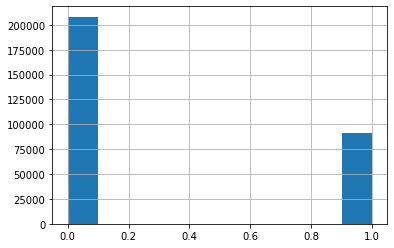

In [58]:
df.target.hist()

In [70]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
64495,64495,1,0,1,0,0,1,1,4,0,...,914,0,4,0,5,18,61,6,6,1
251897,251897,1,1,1,0,1,2,1,0,1,...,4394,0,2,1,7,18,147,1,0,0
25196,25196,1,1,1,0,1,2,4,2,2,...,5261,0,2,0,13,16,67,0,1,0
269214,269214,1,0,0,1,1,1,4,4,5,...,1470,1,4,2,0,16,49,6,2,0
130501,130501,1,1,0,1,1,0,2,5,2,...,1541,0,4,2,5,14,169,0,9,1


In [111]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300000 entries, 2021-07-07 to 2021-02-04
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      300000 non-null  int64
 1   bin_0   300000 non-null  int64
 2   bin_1   300000 non-null  int64
 3   bin_2   300000 non-null  int64
 4   bin_3   300000 non-null  int64
 5   bin_4   300000 non-null  int64
 6   nom_0   300000 non-null  int64
 7   nom_1   300000 non-null  int64
 8   nom_2   300000 non-null  int64
 9   nom_3   300000 non-null  int64
 10  nom_4   300000 non-null  int64
 11  nom_5   300000 non-null  int64
 12  nom_6   300000 non-null  int64
 13  nom_7   300000 non-null  int64
 14  nom_8   300000 non-null  int64
 15  nom_9   300000 non-null  int64
 16  ord_0   300000 non-null  int64
 17  ord_1   300000 non-null  int64
 18  ord_2   300000 non-null  int64
 19  ord_3   300000 non-null  int64
 20  ord_4   300000 non-null  int64
 21  ord_5   300000 non-null  int64
 22  day 

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('target', axis = 1), df.target, test_size=0.33)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
estimator = LogisticRegression()

estimator.fit(X_train, y_train)
accuracy_score(y_test, estimator.predict(X_test))

0.6901818181818182

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=3)
estimator = LogisticRegression()
np.mean(cross_val_score(estimator, df_encoded.drop('target', axis = 1), df_encoded.target, scoring ='accuracy',cv =kf))

0.6118866666666666

In [79]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3)
np.mean(cross_val_score(estimator, df_encoded.drop('target', axis = 1), df.target, scoring ='accuracy',cv =kf))

0.6410466666666667

### Time Series cross validation

In [99]:
df['year']=2021
df['date'] = df.apply(lambda x: pd.to_datetime(str(x['year']) + "-" + str(x['month']) + "-" + str(x['day'])),  axis =1)

In [91]:
df['date'].head()

64495    2021-07-07
251897   2021-01-02
25196    2021-02-01
269214   2021-03-07
130501   2021-10-01
Name: date, dtype: datetime64[ns]

In [101]:
df.set_index('date', inplace=True)

In [102]:
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,year
date,,,,,,,,,,,,,,,,,,,,,
2021-07-07,64495,1,0,1,0,0,1,1,4,0,...,0,4,0,5,18,61,6,6,1,0
2021-01-02,251897,1,1,1,0,1,2,1,0,1,...,0,2,1,7,18,147,1,0,0,0
2021-02-01,25196,1,1,1,0,1,2,4,2,2,...,0,2,0,13,16,67,0,1,0,0
2021-03-07,269214,1,0,0,1,1,1,4,4,5,...,1,4,2,0,16,49,6,2,0,0
2021-10-01,130501,1,1,0,1,1,0,2,5,2,...,0,4,2,5,14,169,0,9,1,0


In [113]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

tscv = TimeSeriesSplit(n_splits = 5)
accuracy = []
for train_index, test_index in tscv.split(df_encoded.sort_index()):
    cv_train, cv_test = df_encoded.iloc[train_index], df_encoded.iloc[test_index]
    
    estimator.fit(cv_train.drop('target', axis = 1), cv_train.target)
    
    predictions = estimator.predict(cv_test.drop('target', axis = 1))
    accuracy.append(accuracy_score(cv_test.target, predictions))
    
print("accuracy: {}".format(np.mean(accuracy)))

accuracy: 0.6618280000000001


In [ ]:
np.mean(cross_val_score(estimator, df_encoded.sort_index().drop('target', axis = 1), df_encoded.sort_index().target, scoring ='accuracy',cv =tscv))